In [1]:
# imported libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("nba.csv", encoding = "unicode escape")
df.shape

(457, 8)

In [3]:
df.head(10)

,Name,Team,Number,Position,Age,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,231,NaN,5000000.0
5,Amir Johnson,Boston Celtics,90,PF,29,240,NaN,12000000.0
6,Jordan Mickey,Boston Celtics,55,PF,21,235,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41,C,25,238,Gonzaga,2165160.0
8,Terry Rozier,Boston Celtics,12,PG,22,190,Louisville,1824360.0
9,Marcus Smart,Boston Celtics,36,PG,22,220,Oklahoma State,3431040.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    int64  
 3   Position  457 non-null    object 
 4   Age       457 non-null    int64  
 5   Weight    457 non-null    int64  
 6   College   373 non-null    object 
 7   Salary    446 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 28.7+ KB


In [5]:
#Checking the total null values in the dataframe
pd.isnull(df).sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Weight       0
College     84
Salary      11
dtype: int64

In [6]:
df[df.isnull().any(axis=1)]

,Name,Team,Number,Position,Age,Weight,College,Salary
2,John Holland,Boston Celtics,30,SG,27,205,Boston University,NaN
4,Jonas Jerebko,Boston Celtics,8,PF,29,231,NaN,5000000.0
5,Amir Johnson,Boston Celtics,90,PF,29,240,NaN,12000000.0
15,Bojan Bogdanovic,Brooklyn Nets,44,SG,27,216,NaN,3425510.0
20,Sergey Karasev,Brooklyn Nets,10,SG,22,208,NaN,1599840.0
...,...,...,...,...,...,...,...,...
445,Dante Exum,Utah Jazz,11,PG,20,190,NaN,3777720.0
447,Rudy Gobert,Utah Jazz,27,C,23,245,NaN,1175880.0
450,Joe Ingles,Utah Jazz,2,SF,28,226,NaN,2050000.0
454,Raul Neto,Utah Jazz,25,PG,24,179,NaN,900000.0


In [7]:
# filling the colleges to Unknown since they were 84 players we cant neglet them
df["College"] = df["College"].fillna("Unknown")

In [8]:
#Filling the Salary with mean by grouping with team since every team has their own budget

df["Salary"] = df.groupby("Team")["Salary"].transform(lambda salary : salary.fillna(salary.mean()))


In [9]:
# Checking for null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    int64  
 3   Position  457 non-null    object 
 4   Age       457 non-null    int64  
 5   Weight    457 non-null    int64  
 6   College   457 non-null    object 
 7   Salary    457 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 28.7+ KB


In [10]:
df.head(10)

,Name,Team,Number,Position,Age,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,180,Texas,7.730337e+06
1,Jae Crowder,Boston Celtics,99,SF,25,235,Marquette,6.796117e+06
2,John Holland,Boston Celtics,30,SG,27,205,Boston University,4.181505e+06
3,R.J. Hunter,Boston Celtics,28,SG,22,185,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8,PF,29,231,Unknown,5.000000e+06
5,Amir Johnson,Boston Celtics,90,PF,29,240,Unknown,1.200000e+07
6,Jordan Mickey,Boston Celtics,55,PF,21,235,LSU,1.170960e+06
7,Kelly Olynyk,Boston Celtics,41,C,25,238,Gonzaga,2.165160e+06
8,Terry Rozier,Boston Celtics,12,PG,22,190,Louisville,1.824360e+06
9,Marcus Smart,Boston Celtics,36,PG,22,220,Oklahoma State,3.431040e+06


In [11]:
# Changing datatype of salary
df["Salary"] = df["Salary"].astype(int)
df.head()

,Name,Team,Number,Position,Age,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,180,Texas,7730337
1,Jae Crowder,Boston Celtics,99,SF,25,235,Marquette,6796117
2,John Holland,Boston Celtics,30,SG,27,205,Boston University,4181504
3,R.J. Hunter,Boston Celtics,28,SG,22,185,Georgia State,1148640
4,Jonas Jerebko,Boston Celtics,8,PF,29,231,Unknown,5000000


In [12]:
#checking for duplicates

df[df.duplicated()]

,Name,Team,Number,Position,Age,Weight,College,Salary


In [13]:
#Checking the age and weight to create a new columns
df[["Age","Weight","Salary"]].describe()

,Age,Weight,Salary
count,457.000000,457.000000,4.570000e+02
mean,26.938731,221.522976,4.851922e+06
std,4.404016,26.368343,5.170364e+06
min,19.000000,161.000000,3.088800e+04
25%,24.000000,200.000000,1.100602e+06
50%,26.000000,220.000000,2.854940e+06
75%,30.000000,240.000000,6.486486e+06
max,40.000000,307.000000,2.500000e+07


In [14]:
# age categorization

def categorize_age(age):
    if age <= 25:
        return '18-25'
    elif age <=30:
        return '25-30'
    elif age <=35:
        return '30-35'
    else:
        return '35-40'

df["Age_Group"] = df["Age"].apply(categorize_age)

df.head()


,Name,Team,Number,Position,Age,Weight,College,Salary,Age_Group
0,Avery Bradley,Boston Celtics,0,PG,25,180,Texas,7730337,18-25
1,Jae Crowder,Boston Celtics,99,SF,25,235,Marquette,6796117,18-25
2,John Holland,Boston Celtics,30,SG,27,205,Boston University,4181504,25-30
3,R.J. Hunter,Boston Celtics,28,SG,22,185,Georgia State,1148640,18-25
4,Jonas Jerebko,Boston Celtics,8,PF,29,231,Unknown,5000000,25-30


In [15]:
# Weight categorization

def weight_categorize(weight):
    if weight <= 160:
        return "150-200"
    elif weight <= 200:
        return "200-250"
    elif weight <= 250:
        return "250-300"
    else:
        return "300-350"

df["Weight_Group"] = df["Weight"].apply(weight_categorize)

df.head()

,Name,Team,Number,Position,Age,Weight,College,Salary,Age_Group,Weight_Group
0,Avery Bradley,Boston Celtics,0,PG,25,180,Texas,7730337,18-25,200-250
1,Jae Crowder,Boston Celtics,99,SF,25,235,Marquette,6796117,18-25,250-300
2,John Holland,Boston Celtics,30,SG,27,205,Boston University,4181504,25-30,250-300
3,R.J. Hunter,Boston Celtics,28,SG,22,185,Georgia State,1148640,18-25,200-250
4,Jonas Jerebko,Boston Celtics,8,PF,29,231,Unknown,5000000,25-30,250-300


In [16]:
# BMI calculation

def bmi(weight):
    bmi = (weight/70 **2)*703
    return bmi

df["BMI"] = df["Weight"].apply(bmi).astype(int)

df.head(5)

,Name,Team,Number,Position,Age,Weight,College,Salary,Age_Group,Weight_Group,BMI
0,Avery Bradley,Boston Celtics,0,PG,25,180,Texas,7730337,18-25,200-250,25
1,Jae Crowder,Boston Celtics,99,SF,25,235,Marquette,6796117,18-25,250-300,33
2,John Holland,Boston Celtics,30,SG,27,205,Boston University,4181504,25-30,250-300,29
3,R.J. Hunter,Boston Celtics,28,SG,22,185,Georgia State,1148640,18-25,200-250,26
4,Jonas Jerebko,Boston Celtics,8,PF,29,231,Unknown,5000000,25-30,250-300,33


Exploratory Data Analysis

In [17]:
# summary statistics of the 'age', 'weight', and 'salary' columns.

df[["Age","Weight","Salary"]].describe()

,Age,Weight,Salary
count,457.000000,457.000000,4.570000e+02
mean,26.938731,221.522976,4.851922e+06
std,4.404016,26.368343,5.170364e+06
min,19.000000,161.000000,3.088800e+04
25%,24.000000,200.000000,1.100602e+06
50%,26.000000,220.000000,2.854940e+06
75%,30.000000,240.000000,6.486486e+06
max,40.000000,307.000000,2.500000e+07


In [18]:
df.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Weight', 'College',
       'Salary', 'Age_Group', 'Weight_Group', 'BMI'],
      dtype='object')

In [19]:
# Calculating the average age, weight, and salary of players in each 'position' category.

Avg_age = df.groupby(["Position"])["Age"].mean()
Avg_weight = df.groupby(["Position"])["Weight"].mean()
Avg_salary = df.groupby(["Position"])["Salary"].mean().astype(int)

print(Avg_age, Avg_weight, Avg_salary)

Position
C     27.371795
PF    27.160000
PG    26.847826
SF    26.858824
SG    26.539216
Name: Age, dtype: float64 Position
C     254.205128
PF    240.430000
PG    189.478261
SF    221.776471
SG    206.686275
Name: Weight, dtype: float64 Position
C     5967052
PF    4548356
PG    5104348
SF    4874921
SG    4049943
Name: Salary, dtype: int32


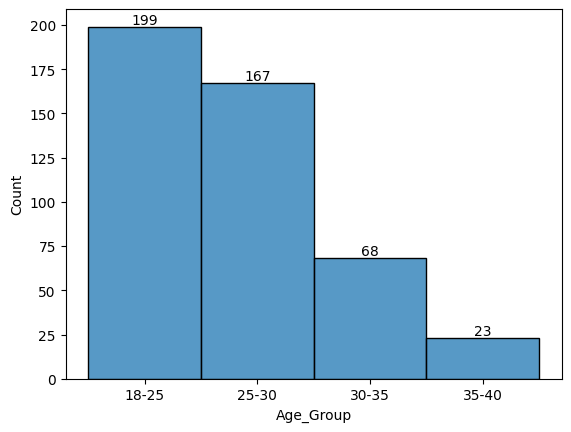

In [20]:
# Creating a histogram of player ages.

ax = sns.histplot(data =  df, x="Age_Group")

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Position', ylabel='Salary'>

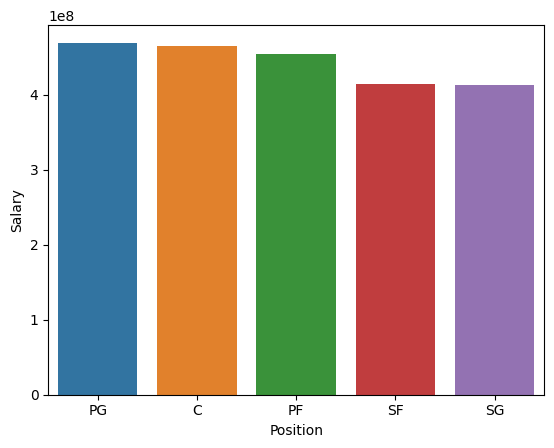

In [21]:
# Creating a boxplot of player salaries for each 'position'

position_salaries = df.groupby(["Position"], as_index = False)["Salary"].sum().sort_values(by="Salary", ascending = False)

sns.barplot(data = position_salaries, x= "Position", y="Salary")

In [22]:
df.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Weight', 'College',
       'Salary', 'Age_Group', 'Weight_Group', 'BMI'],
      dtype='object')

<Axes: xlabel='Age_Group', ylabel='Salary'>

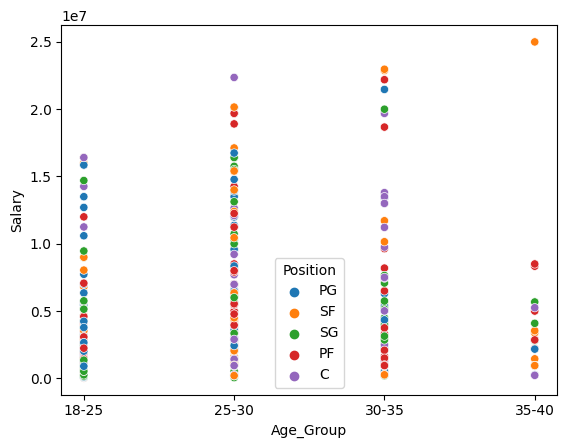

In [23]:
# Plotting a scatter plot of 'age' vs. 'salary' with a different color for each 'position'.

sns.scatterplot(data = df, x="Age_Group",y="Salary",hue = "Position")

In [24]:
df.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Weight', 'College',
       'Salary', 'Age_Group', 'Weight_Group', 'BMI'],
      dtype='object')

<Axes: xlabel='Name', ylabel='Salary'>

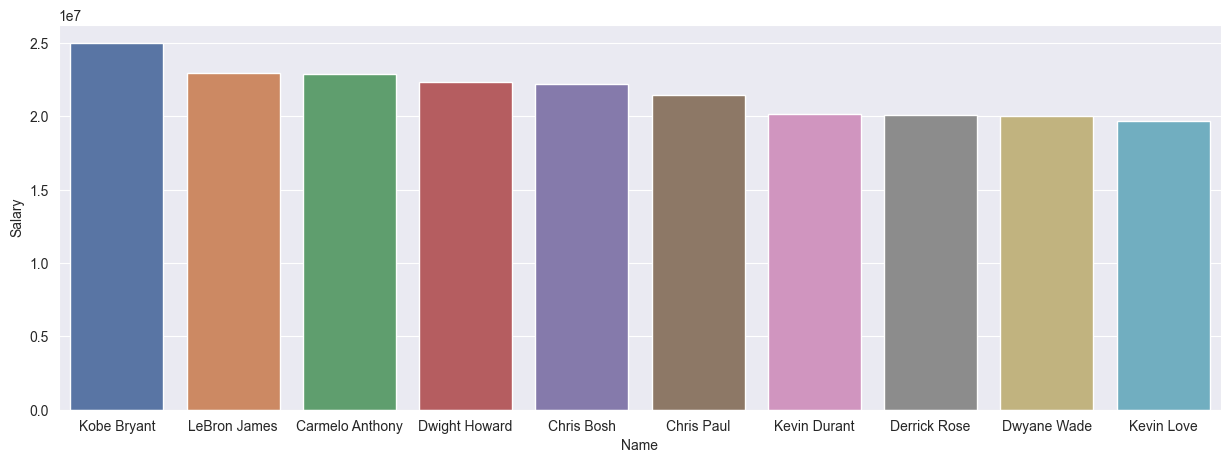

In [25]:
# Displaying the top 10 players with the highest salaries.

top_10_players = df.sort_values(by="Salary",ascending=False).head(10)

sns.set({"figure.figsize":(15,5)})
sns.barplot(data=top_10_players, x="Name" ,y="Salary")

In [26]:
df.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Weight', 'College',
       'Salary', 'Age_Group', 'Weight_Group', 'BMI'],
      dtype='object')

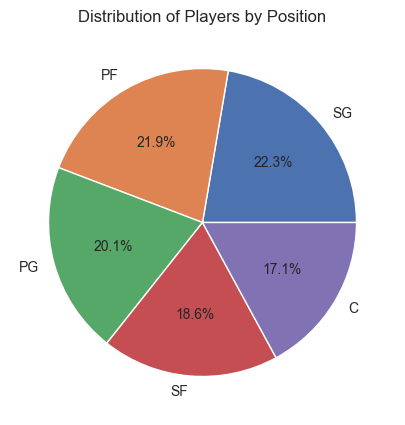

In [27]:
# Ploting a pie chart to show the distribution of players across different 'positions'.

position_counts = df["Position"].value_counts()

player_count = position_counts.values
player_position = position_counts.index

plt.pie(player_count,labels= player_position, autopct='%1.1f%%')
plt.title('Distribution of Players by Position')
plt.show()

In [28]:
df.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Weight', 'College',
       'Salary', 'Age_Group', 'Weight_Group', 'BMI'],
      dtype='object')

In [29]:
# Displaying the average salary of players for each 'team'.

avg_salary = df.groupby(["Team"], as_index = False)["Salary"].mean().sort_values(by="Salary",ascending = False)

avg_salary

,Team,Salary
5,Cleveland Cavaliers,7.642049e+06
15,Miami Heat,6.347359e+06
12,Los Angeles Clippers,6.323643e+06
20,Oklahoma City Thunder,6.251020e+06
9,Golden State Warriors,5.924600e+06
4,Chicago Bulls,5.785559e+06
26,San Antonio Spurs,5.629516e+06
14,Memphis Grizzlies,5.467920e+06
3,Charlotte Hornets,5.222728e+06
29,Washington Wizards,5.088576e+06


<Axes: xlabel='Salary', ylabel='Team'>

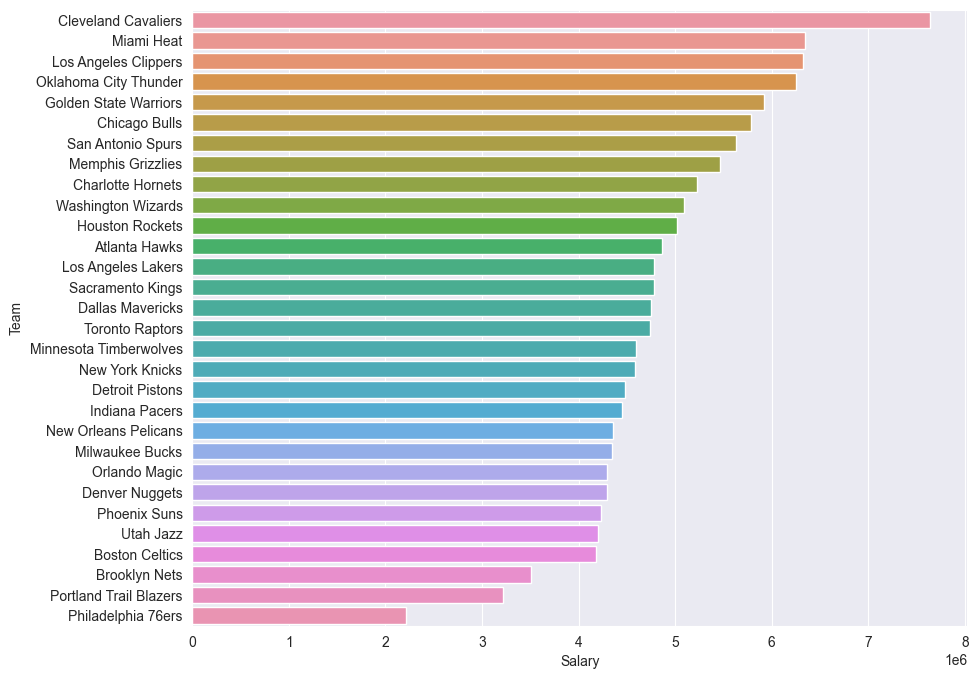

In [30]:
# Displaying the average salary of players for each 'team'.

avg_salary = df.groupby(["Team"], as_index = False)["Salary"].mean().sort_values(by="Salary",ascending = False)


plt.figure(figsize=(10, 8))
sns.barplot(data = avg_salary, x="Salary",y="Team",orient='h')



In [31]:
# Getting the index at which the minimum weight value is present.

min_weight_index = df["Weight"].idxmin()
min_weight_index

152

In [32]:
# Sorting values based on name in alphabetical order for the rows

sorted_data = df.sort_values(by = "Name", inplace=False)

sorted_data.head(10)

,Name,Team,Number,Position,Age,Weight,College,Salary,Age_Group,Weight_Group,BMI
152,Aaron Brooks,Chicago Bulls,0,PG,31,161,Oregon,2250000,30-35,200-250,23
356,Aaron Gordon,Orlando Magic,0,PF,20,220,Arizona,4171680,18-25,250-300,31
328,Aaron Harrison,Charlotte Hornets,9,SG,21,210,Kentucky,525093,18-25,250-300,30
404,Adreian Payne,Minnesota Timberwolves,33,PF,25,237,Michigan State,1938840,18-25,250-300,34
312,Al Horford,Atlanta Hawks,15,C,30,245,Florida,12000000,25-30,250-300,35
330,Al Jefferson,Charlotte Hornets,25,C,31,289,Unknown,13500000,30-35,300-350,41
428,Al-Farouq Aminu,Portland Trail Blazers,8,SF,25,215,Wake Forest,8042895,18-25,250-300,30
368,Alan Anderson,Washington Wizards,6,SG,33,220,Michigan State,4000000,30-35,250-300,31
135,Alan Williams,Phoenix Suns,15,C,23,260,UC Santa Barbara,83397,18-25,300-350,37
444,Alec Burks,Utah Jazz,10,SG,24,214,Colorado,9463484,18-25,250-300,30


In [33]:
# Creating a series from given dataframe on “name” column and display top and last 10

name_series = df["Name"]

top_10_names = name_series.head(10)
bottom_10_names = name_series.tail(10)

print(top_10_names)
print(bottom_10_names)

0    Avery Bradley
1      Jae Crowder
2     John Holland
3      R.J. Hunter
4    Jonas Jerebko
5     Amir Johnson
6    Jordan Mickey
7     Kelly Olynyk
8     Terry Rozier
9     Marcus Smart
Name: Name, dtype: object
447       Rudy Gobert
448    Gordon Hayward
449       Rodney Hood
450        Joe Ingles
451     Chris Johnson
452        Trey Lyles
453      Shelvin Mack
454         Raul Neto
455      Tibor Pleiss
456       Jeff Withey
Name: Name, dtype: object


In [34]:
df.head()

,Name,Team,Number,Position,Age,Weight,College,Salary,Age_Group,Weight_Group,BMI
0,Avery Bradley,Boston Celtics,0,PG,25,180,Texas,7730337,18-25,200-250,25
1,Jae Crowder,Boston Celtics,99,SF,25,235,Marquette,6796117,18-25,250-300,33
2,John Holland,Boston Celtics,30,SG,27,205,Boston University,4181504,25-30,250-300,29
3,R.J. Hunter,Boston Celtics,28,SG,22,185,Georgia State,1148640,18-25,200-250,26
4,Jonas Jerebko,Boston Celtics,8,PF,29,231,Unknown,5000000,25-30,250-300,33


In [35]:
# Determining the top 5 colleges with the most represented players.

clg_players = df.groupby(["College"], as_index = False)["Name"].size().sort_values(by="size", ascending=False)

clg_players.head(5)

,College,size
99,Unknown,84
45,Kentucky,22
26,Duke,20
43,Kansas,18
66,North Carolina,16


In [36]:
# Filtering Unknown Colleges
Unknown_colleges = df[df["College"] == "Unknown"]
Unknown_colleges.head()

,Name,Team,Number,Position,Age,Weight,College,Salary,Age_Group,Weight_Group,BMI
4,Jonas Jerebko,Boston Celtics,8,PF,29,231,Unknown,5000000,25-30,250-300,33
5,Amir Johnson,Boston Celtics,90,PF,29,240,Unknown,12000000,25-30,250-300,34
15,Bojan Bogdanovic,Brooklyn Nets,44,SG,27,216,Unknown,3425510,25-30,250-300,30
20,Sergey Karasev,Brooklyn Nets,10,SG,22,208,Unknown,1599840,18-25,250-300,29
32,Thanasis Antetokounmpo,New York Knicks,43,SF,23,205,Unknown,30888,18-25,250-300,29


In [37]:
# Since there are more unknown values we need to fill the data
Unknown_colleges = df[df["College"] == "Unknown"]

print(Unknown_colleges[Unknown_colleges["Age_Group"] == "18-25"].shape)
print(Unknown_colleges[Unknown_colleges["Age_Group"] == "25-30"].shape)
print(Unknown_colleges[Unknown_colleges["Age_Group"] == "30-35"].shape)
print(Unknown_colleges[Unknown_colleges["Age_Group"] == "35-40"].shape)
print(Unknown_colleges[Unknown_colleges["Age_Group"] == "40-45"].shape)

(26, 11)
(33, 11)
(19, 11)
(6, 11)
(0, 11)


In [38]:
# Analyzing 18-25 Age_group players
# Taking the colleges with players

known_colleges = df[df["College"] != "Unknown"]

age_group_18_25 = known_colleges[known_colleges["Age_Group"] == "18-25"]

age_group_18_25["College"].mode()


0    Kentucky
Name: College, dtype: object

In [39]:
age_group_25_30 = known_colleges[known_colleges["Age_Group"] == "25-30"]

age_group_25_30["College"].mode()

0    North Carolina
Name: College, dtype: object

In [40]:
age_group_30_35 = known_colleges[known_colleges["Age_Group"] == "30-35"]

age_group_30_35["College"].mode()

0      Duke
1    Kansas
Name: College, dtype: object

In [41]:
age_group_35_40 = known_colleges[known_colleges["Age_Group"] == "35-40"]

age_group_35_40["College"].mode()

0    Florida
Name: College, dtype: object

In [42]:
df.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Weight', 'College',
       'Salary', 'Age_Group', 'Weight_Group', 'BMI'],
      dtype='object')

In [43]:
# Now filling the above analysed data into Unknown values in dataframe

df.loc[(df["Age_Group"] == "18-25") & (df["College"] == "Unknown"), "College"] = "Kentucky"
df.loc[(df["Age_Group"] == "25-30") & (df["College"] == "Unknown"), "College"] = "North Carolina"
df.loc[(df["Age_Group"] == "30-35") & (df["College"] == "Unknown"), "College"] = "Duke"
df.loc[(df["Age_Group"] == "35-40") & (df["College"] == "Unknown"), "College"] = "Florida"


In [44]:
df.head(20)

,Name,Team,Number,Position,Age,Weight,College,Salary,Age_Group,Weight_Group,BMI
0,Avery Bradley,Boston Celtics,0,PG,25,180,Texas,7730337,18-25,200-250,25
1,Jae Crowder,Boston Celtics,99,SF,25,235,Marquette,6796117,18-25,250-300,33
2,John Holland,Boston Celtics,30,SG,27,205,Boston University,4181504,25-30,250-300,29
3,R.J. Hunter,Boston Celtics,28,SG,22,185,Georgia State,1148640,18-25,200-250,26
4,Jonas Jerebko,Boston Celtics,8,PF,29,231,North Carolina,5000000,25-30,250-300,33
5,Amir Johnson,Boston Celtics,90,PF,29,240,North Carolina,12000000,25-30,250-300,34
6,Jordan Mickey,Boston Celtics,55,PF,21,235,LSU,1170960,18-25,250-300,33
7,Kelly Olynyk,Boston Celtics,41,C,25,238,Gonzaga,2165160,18-25,250-300,34
8,Terry Rozier,Boston Celtics,12,PG,22,190,Louisville,1824360,18-25,200-250,27
9,Marcus Smart,Boston Celtics,36,PG,22,220,Oklahoma State,3431040,18-25,250-300,31


In [45]:
# Determining the top 5 colleges with the most represented players.

clg_players = df.groupby(["College"], as_index = False)["Name"].size().sort_values(by="size", ascending=False)

clg_players.head(5)

,College,size
66,North Carolina,49
45,Kentucky,48
26,Duke,39
43,Kansas,18
28,Florida,16
